### Install Runhouse

In [ ]:
!pip install --index-url https://api.run.house/pypi runhouse-nightly==0.0.1.dev20221203

In [1]:
import runhouse as rh

INFO | 2022-12-08 03:28:41,402 | Loaded Runhouse config from /Users/donny/.rh/config.yaml


### Login to Runhouse to load in secrets.

In [ ]:
# You can add token=<your token> if you want to be able to run this without pasting into stdin
rh.login(download_secrets=True, download_config=True)

In [ ]:
# Only if you're running inside Colab!
!gcloud init
!gcloud auth application-default login
!cp -r /content/.config/* ~/.config/gcloud

In [ ]:
# Check that secrets are loaded in properly and at least one cloud is ready to use.
!sky check

### Create the Stable Diffusion send

In [ ]:
def sd_generate(prompt, num_images=1,
                steps=100, guidance_scale=7.5,
                model_id='stabilityai/stable-diffusion-2'):
    from diffusers import StableDiffusionPipeline
    import torch
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision='fp16').to('cuda')
    return pipe([prompt] * num_images, num_inference_steps=steps, guidance_scale=guidance_scale).images

In [ ]:
gpu = rh.cluster(name='rh-v100', instance_type='V100:1', provider='gcp', use_spot=True)
generate_gpu = rh.send(fn=sd_generate,
                       hardware=gpu, 
                       reqs=['./', "torch==1.12.0", 'diffusers', 'transformers'],
                       load_secrets=True,
                       load_from=['rns'], save_to=['rns'],
                       name='generate_sd_2')

In [ ]:
rh_prompt = 'A woman running on the roof of a house, digital art.'
images = generate_gpu(rh_prompt, num_images=2, steps=50, guidance_scale=9)

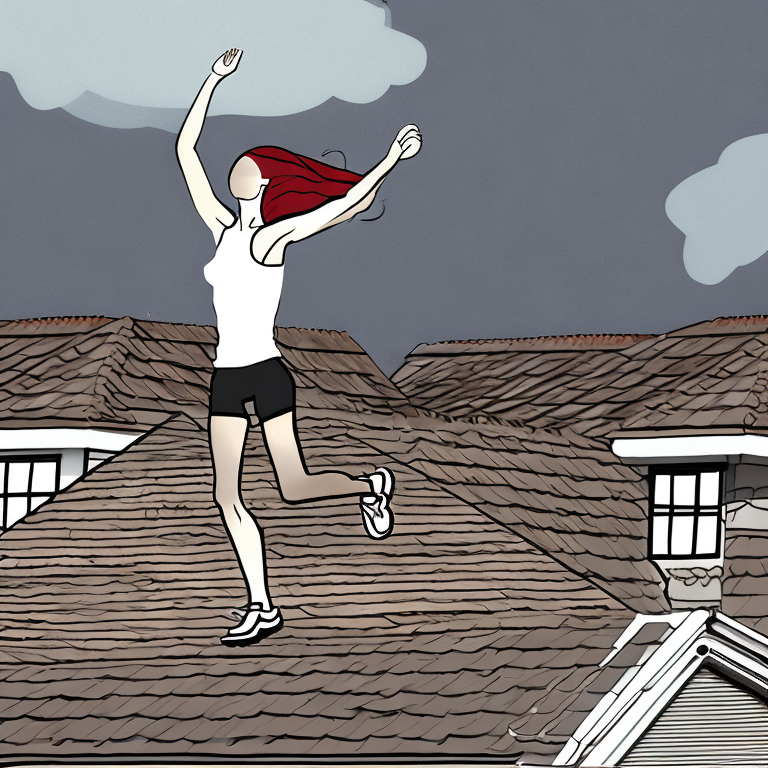

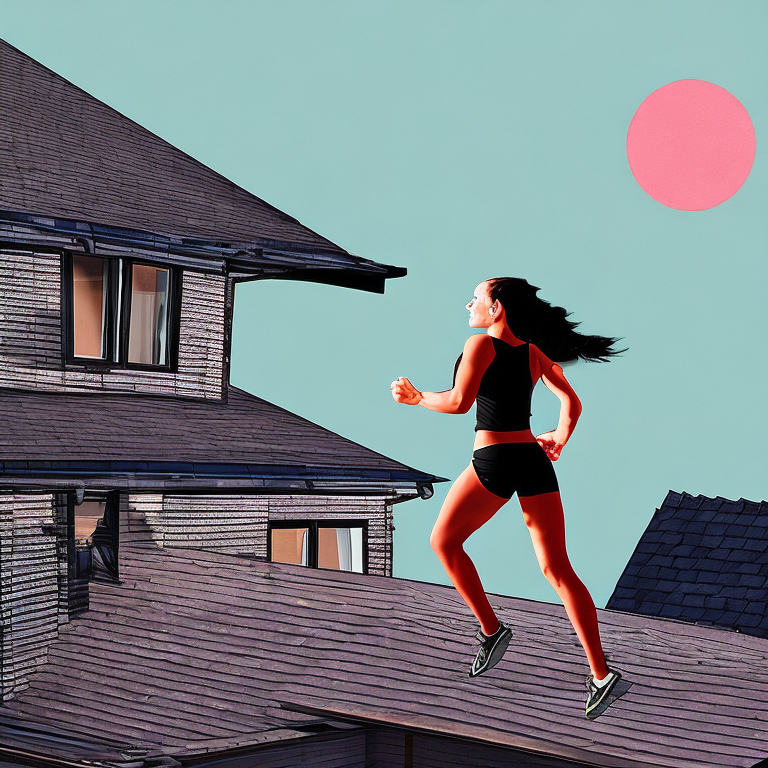

[None, None]

In [ ]:
[display(image) for image in images]

# Loading from an Existing Send Created Elsewhere

In [2]:
generate_gpu = rh.send(name='sd_generate', load_from=['rns'], save_to=[])

Output()

Output()

INFO | 2022-12-08 03:29:00,852 | Setting up Send on cluster.
INFO | 2022-12-08 03:29:01,022 | Connected (version 2.0, client OpenSSH_7.9p1)
INFO | 2022-12-08 03:29:01,295 | Authentication (publickey) successful!
INFO | 2022-12-08 03:29:01,312 | Copying local package tutorials to cluster <rh-v100>
INFO | 2022-12-08 03:29:01,564 | Installing packages on cluster rh-v100: ['./', 'diffusers']
INFO | 2022-12-08 03:29:01,739 | Send setup complete.


INFO | 2022-12-08 03:30:25,334 | Running sd_generate via SSH
INFO | 2022-12-08 03:30:38,295 | Time to send message: 12.96 seconds


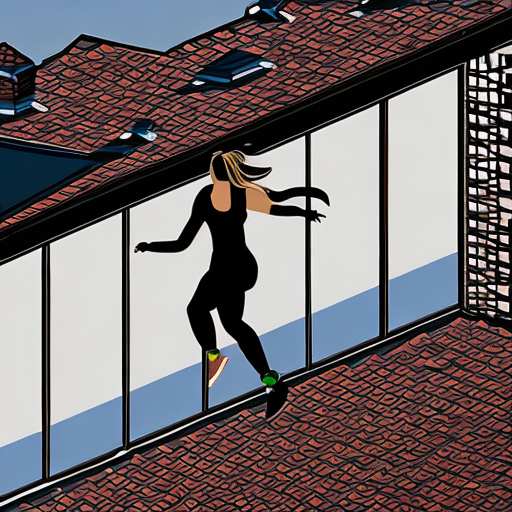

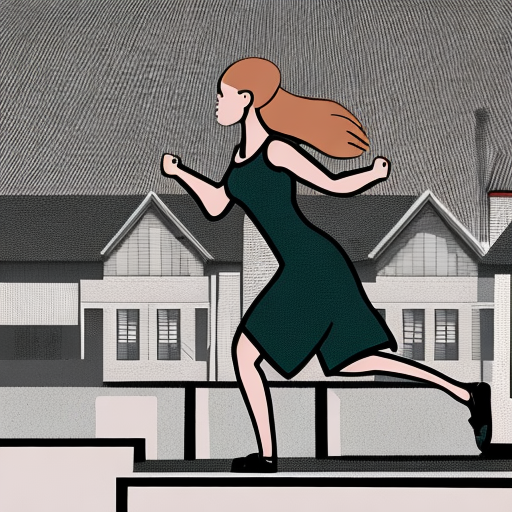

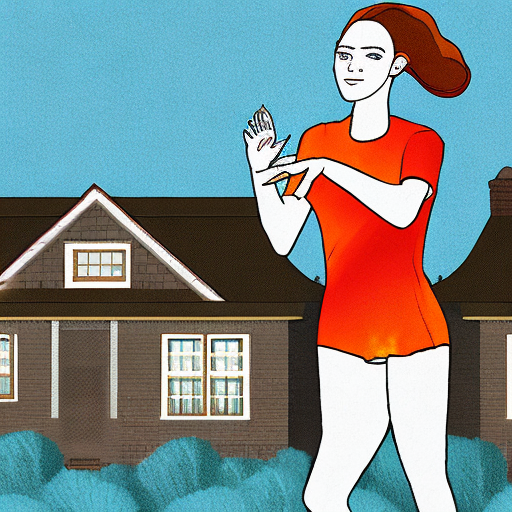

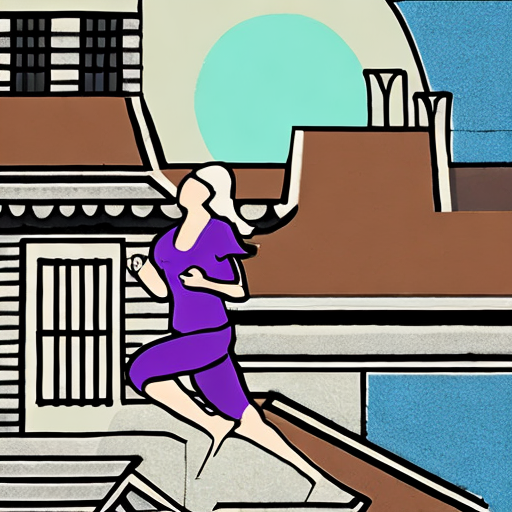

[None, None, None, None]

In [4]:
rh_prompt = 'A digital illustration of a woman running on the roof of a house.'
images = generate_gpu(rh_prompt, num_images=4, steps=50)
[display(image) for image in images]